### Natural Language Processing - Assignment 1

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591
5) Jayachandhran Saravanan - C0910392

### Index
- __0. Data Source Explanation__
- __1. Dataset Collection__
- __2. Exploratory Data Analysis__
- __3. Data Cleaning & Text Processing__
- __4. Word Clouds__
- __5. Word Vectorization methods__
- __6. Model Building__
- __7. Evaluating Model Results__

### 0. Data Source explanation

For this project we have selected __textual data from video comments__ as our data source.

This data is annotated into 2 possible categories: __violent threat (1)__ or __not violent threat (0)__.

The origin of the data is found within the paper called: __"THREAT: A Large Annotated Corpus for Detection of Violent Threats"__

which was published in reputable organizations like __IEEE__ and __Semantic Scholar__.

On the abstract, the authors state that the dataset consist on around __30'000 sentences from 10'000 different Youtube video comments__ (real data). Each sentence was labelled manually.

The purpose of this public dataset is to enable the development of tools (such as the one we are working on this project) to __analyze online threats and/or hateful speech__.

To be more specific, we are provided with the following txt file: __VideoCommentsThreatCorpus.txt__, from which we will extract our texts and labels.

We have downloaded the dataset and saved it within a personal __Google Drive repository__ to avoid future issues, and have the data available for us at any moment.

Original sources (IEEE and Semantic Scholar):
- https://ieeexplore.ieee.org/document/8877435
- https://www.semanticscholar.org/paper/THREAT%3A-A-Large-Annotated-Corpus-for-Detection-of-Hammer-Riegler/32b11247f4232d1262633b3cd48b6de3a2360632

### 1. Dataset Collection
Let's start by acquiring our dataset from an external source.

The columns of our dataset are as follows:
- __text__: raw textual data
- __label__: 0 --> the text does not contain a violent threat, 1 --> the text contains a violent threat

First, to gather our data, let's import some required libraries.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request

Let's create a __Helper class__ that will allow us to __extract (download) the data__ from its original source (Google Drive).

This class will also allow us to __read the file and return a DataFrame__ from Pandas library.

In [2]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset from the original source Google Drive
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset, and return the DataFrame from Pandas
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue
                # let's create a generator so we don't store the whole content in memory
                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path, encoding="utf-8") as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

Let's __instantiate our Helper class__ and __donwload the data from its original source__ and obtain the data from the file as a __DataFrame__.

In [3]:
# instantiate our custom Helper class
helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)
# download our dataset from its original source
helper.download_dataset()
# read the dataset as a DataFrame from Pandas
df = helper.read_dataset('dataset')
df.head()

,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


Now we have the dataset ready for an exploratory data analysis (EDA) inside the __df__ variable.

### 2. Exploratory Data Analysis

Let's start our EDA. For this task we have implemented a class called __ExploratoryDataAnalysis__ that takes the following __parameters for initialization__:
- DataFrame from Pandas library
- String defining target column name

... and calculates some basic analysis over the data.

Some of the implemented methods are capable of:

- Displaying and plotting the __Value counts of our target column__
- Displaying and plotting the number of rows with __missing values__ within our dataframe
- Displaying and plotting the number of __duplicated rows__ within our dataframe

The purpose of creating a class and methods was to avoid repetitive code and to enable ourselves to re-use the code with different datasets.

In [4]:
import matplotlib.pyplot as plt # library for 2D and 3D plots
plt.style.use('ggplot')
import random # randomize functions

In [5]:
# let's implement a class that will perform an EDA through the use of methods
class ExploratoryDataAnalysis:
    
    def __init__(self, df, target_column_name, lines=30):
        self.df = df
        self.target_column_name = target_column_name
        self.lines = lines
        self.colors = ['#DBFFD7', '#ffd7db', '#d7dbff', '#fbd7ff', '#e2d8d4', '#ffc7bb']
        self.color_pairs = []
        self.set_color_pairs()
    
    def set_color_pairs(self):
        # let's set the color pairs for our plots
        for i in range(3):
            color_1 = random.choice(self.colors)
            colors_copy = self.colors[:]
            colors_copy.remove(color_1)
            color_2 = random.choice(colors_copy)
            self.color_pairs.append((color_1, color_2))
        
    def print_line(self):
        print("-" * self.lines)
    
    def display_shape(self):
        # check for the shape (number of rows and columns) of the dataset
        print("SHAPE")
        print("# Rows:\t", df.shape[0])
        print("# Columns:", df.shape[1])
    
    def display_target_value_counts(self, percentage=False):
        # check for the distribution of target values, take percentage flag into account
        print("TARGET VALUE COUNTS", percentage * "PERCENTAGE (%)")
        print(df[self.target_column_name].value_counts(normalize = percentage) * (100 if percentage else 1))
        print("Total:", "100.00 %" if percentage else df[self.target_column_name].count())
        
    def display_missing_values(self, percentage=False):
        # check for missing values, take percentage flag into account
        print("MISSING VALUES", percentage * "PERCENTAGE (%)")
        print(df.isnull().mean() * 100 if percentage else df.isnull().sum())
        print("Total:", "100.00 %" if percentage else df.isnull().sum().sum())
        
    def display_duplicates(self, percentage=False):
        # check for duplicate values, take percentage flag into account
        print("DUPLICATED ROWS", percentage * "PERCENTAGE (%)")
        print("Total:", "{:.2f} %".format(df.duplicated().mean() * 100) if percentage else df.duplicated().sum())
        
    def display_basic_analysis(self):
        # make use of the previous defined methods to display a basic EDA
        self.print_line()
        self.display_shape()
        self.print_line()
        self.display_target_value_counts()
        self.print_line()
        self.display_target_value_counts(percentage=True)
        self.print_line()
        self.display_missing_values()
        self.print_line()
        self.display_missing_values(percentage=True)
        self.print_line()
        self.display_duplicates()
        self.print_line()
        self.display_duplicates(percentage=True)
        self.print_line()
    
    def plot_target_value_counts(self, ax):
        # to plot we need to set our x and y values first
        x = df[self.target_column_name].unique()
        y = df[self.target_column_name].value_counts()
        # plot the bar in the subplot canvas, using a random generated color
        ax.bar(x, y, color= self.color_pairs[0])
        
        # let's add annotation to our bar graph
        for x_, y_ in zip(x, y): # zip creates the following tuples: (1st x value, 1st y value), (2nd, 2nd) ...
            label = "{:,} ({:.2f} %)".format(y_, y_ * 100/y.sum()).replace(',', "'")
            # annotate at the x and y position, add some offset to center the annotations
            ax.annotate(label, (x_ - 0.2, y_ + 150))
            
        # let's add some titles to the subplot and axis
        ax.title.set_text("Target Value Counts")
        ax.set_xlabel("Unique Values")
        ax.set_ylabel("Value Counts")
        
    def plot_missing_values(self, ax):
        # to plot we need to set our x and y values first
        x = df.columns.to_list()
        y = df.isnull().sum()
        ax.bar(x, y, color = self.color_pairs[1], width = 0.4)
        
        # if there's no missing values we can write it down explicitely using text method
        if y.sum().sum() == 0:
            ax.text(0.5, 0.5, 'No Missing Values', transform=ax.transAxes,
                    fontsize=40, color='gray', alpha=0.5, ha='center', va='center', rotation=25)
        
        # let's add some titles to the subplot and axis
        ax.title.set_text("Missing Values")
        ax.set_xlabel("Column Name")
        ax.set_ylabel("# Rows with Missing Values")
        
    def plot_duplicates(self, ax):
        # to plot we need to set our x and y values first
        x = ['# Non-duplicated Rows', '# Duplicated Rows']
        y = [df.shape[0] - df.duplicated().sum(), df.duplicated().sum()]
        ax.bar(x, y, color = self.color_pairs[2], width = 0.4)
        
        # let's add annotation to our bar graph
        for x_, y_ in enumerate(y): # zip creates the following tuples: (1st x value, 1st y value), (2nd, 2nd) ...
            label = "{:,} ({:.2f} %)".format(y_, y_ * 100/sum(y)).replace(',', "'")
            # annotate at the x and y position, add some offset to center the annotations
            ax.annotate(label, (x_ - 0.2, y_ + 150))
            
        # let's add some titles to the subplot and axis
        ax.title.set_text("Duplicated Rows")
        ax.set_ylabel("# Rows")
        
    def plot_pie_target_value_counts(self, ax):
        # let's set the unique values of our target column, and their value counts
        labels = df[self.target_column_name].unique()
        value_counts = df[self.target_column_name].value_counts()
        
        # let's set the percentage of each value count, explode and color values
        x = [val * 100/value_counts.sum() for val in value_counts]
        explode = [0.1 for i in range(len(x))]
        colors = self.color_pairs[0]
        
        # finally, let's plot the pie
        ax.pie(x, explode, autopct="%.2f", labels=labels, colors=colors)
        
    def plot_pie_missing_values(self, ax):
        # let's set the unique values of our target column, and their value counts
        labels = ['Non-missing', 'Missing']
        value_counts = [df[df.notnull().any(axis=1)].shape[0], # number of rows with non-missing values
                        df[df.isnull().any(axis=1)].shape[0]]  # number of rows with any missing value
        
        # let's set the percentage of each value count, explode and color values
        x = [val * 100/df.shape[0] for val in value_counts]
        explode = [0.1 for i in range(len(x))]
        colors = self.color_pairs[1]
        
        # finally, let's plot the pie
        ax.pie(x, explode, autopct="%.2f", labels=labels, colors=colors)
        
    def plot_pie_duplicates(self, ax):
        # let's set the unique values of our target column, and its value counts per unique value
        labels = ['Non-duplicated', 'Duplicated']
        value_counts = [df.shape[0] - df.duplicated().sum(), df.duplicated().sum()]
        
        # let's set the percentage of each value count, explode and color values
        x = [val * 100/df.shape[0] for val in value_counts]
        explode = [0.1 for i in range(len(x))]
        colors = self.color_pairs[2]
        
        # finally, let's plot the pie
        ax.pie(x, explode, autopct="%.2f", labels=labels, colors=colors)
        
    def plot_basic_analysis(self):
        fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (20,10)) # rows, columns
        self.plot_target_value_counts(ax1)
        self.plot_missing_values(ax2)
        self.plot_duplicates(ax3)
        self.plot_pie_target_value_counts(ax4)
        self.plot_pie_missing_values(ax5)
        self.plot_pie_duplicates(ax6)

Now that our class is implemented we can easily perform an exploratory data analysis over our dataset.

Let's instantiate the class and call some implemented methods.

In [6]:
eda = ExploratoryDataAnalysis(df, "label") # instantiate our EDA class using "label" column as target
eda.display_basic_analysis() # print the EDA in text format

------------------------------
SHAPE
# Rows:	 28643
# Columns: 2
------------------------------
TARGET VALUE COUNTS 
0    27256
1     1387
Name: label, dtype: int64
Total: 28643
------------------------------
TARGET VALUE COUNTS PERCENTAGE (%)
0    95.15763
1     4.84237
Name: label, dtype: float64
Total: 100.00 %
------------------------------
MISSING VALUES 
text     0
label    0
dtype: int64
Total: 0
------------------------------
MISSING VALUES PERCENTAGE (%)
text     0.0
label    0.0
dtype: float64
Total: 100.00 %
------------------------------
DUPLICATED ROWS 
Total: 352
------------------------------
DUPLICATED ROWS PERCENTAGE (%)
Total: 1.23 %
------------------------------


Given the data, we have approximately __30'000 rows__ as expected. From these rows:
- Near __5% correspond to violent threat comments__. Which indicates that our __data is imbalanced__.
- There are __no missing values__, meaning all rows contain a comment (textual data) and its label.
- The __duplicated rows__ represents only near __1.5%__ of the entire dataset.

Now that we have the numbers, let's use the implemented methods to visualize our analysis.

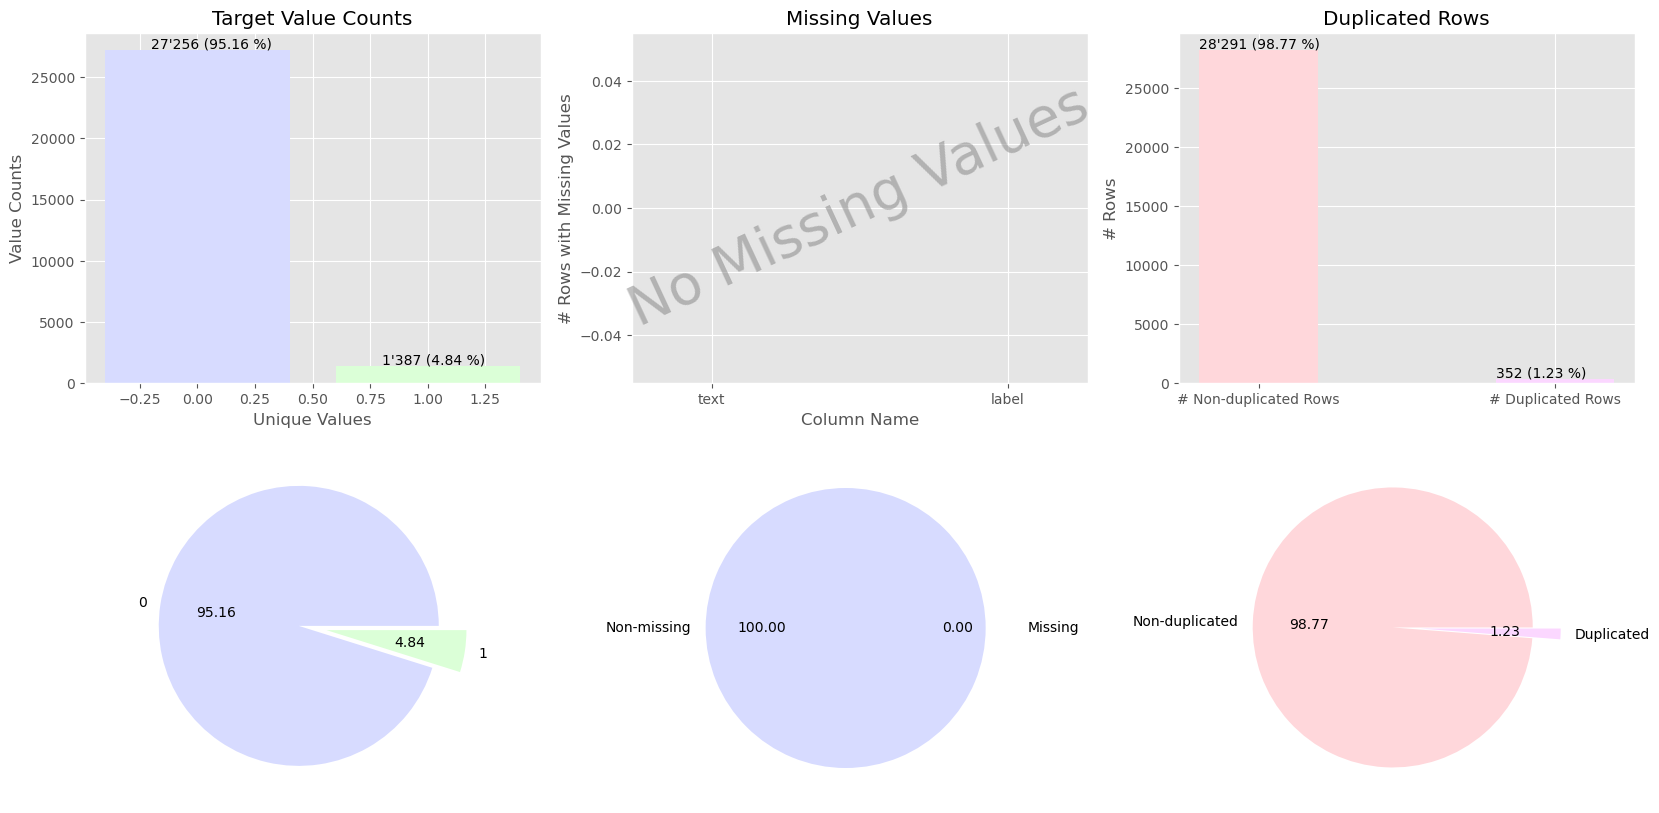

In [7]:
eda.plot_basic_analysis()

Using __bar plots and pie charts__ we are able to quickly understand the __balance of our labels__, and the amount of our duplicated rows.

Now, let's dive a little into the __duplicated rows and see their content and labels__.

In [8]:
df_duplicated = df[df.duplicated()] # DataFrame containing only duplicated rows
filter_0 = df_duplicated['label'] == 0
filter_1 = df_duplicated['label'] == 1

print(df_duplicated[filter_0].shape[0]) # number of duplicated non-violent comments
print(df_duplicated[filter_1].shape[0]) # number of duplicated non-violent comments

324
28


In [9]:
df_duplicated[filter_0].tail()

,text,label
28238,Denne kommentaren har fått for mange negative ...,0
28239,Denne kommentaren har fått for mange negative ...,0
28240,Denne kommentaren har fått for mange negative ...,0
28312,May jesus help us !\n,0
28354,Denne kommentaren har fått for mange negative ...,0


In [10]:
df_duplicated[filter_1].tail()

,text,label
25233,go kill yourself﻿\n,1
26360,Death to islam!\n,1
27408,Death to islam!\n,1
28082,HAHAHAHA CRY AND DIE\n,1
28157,BURN THEM ALL !\n,1


We have 324 duplicated rows of non-violent comments and 28 duplicated rows of violent comments.

Let's calculate the percentage on our entire dataset.

In [11]:
df_filter_0 = df['label'] == 0
df_filter_1 = df['label'] == 1

print(df_duplicated[filter_0].shape[0] * 100 / df[df_filter_0].shape[0]) # % of duplicated rows within non violent comments
print(df_duplicated[filter_1].shape[0] * 100 / df[df_filter_1].shape[0]) # % of duplicated rows within violent comments

1.1887290871734664
2.0187454938716654


### 3. Data Cleaning & Text Processing

Now that we have performed an EDA on our dataset, we have an idea of the steps that we need to follow to clean our data.

Let's start by dealing with the duplicated rows.

As our __duplicated rows consist on only 2% or less__ of the data __for each label__,

we decided to __drop__ this redundant rows so that they don't affect our model training.

In [12]:
print("Number of rows before dropping duplicates:", df.shape[0])
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
print("Number of rows after dropping duplicates:", df.shape[0])

Number of rows before dropping duplicates: 28643
Number of rows after dropping duplicates: 28291


Let's start with the text processing by adding some informative columns to our dataset.

The following information will be added for each row (comment) on our dataset:
- number of words
- number of characters
- number of special characters
- number of digits
- number of upper and lower case characters
- number of stopwords
- number of unique words

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.tail()



,index,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
28286,28638,yeah we are all monsters..I'm gonna kill u rig...,1,10,56,5,0,1,39,3,10
28287,28639,stupid brainwashed idiot..\n,0,3,27,2,0,0,22,0,3
28288,28640,have you EVER been to Serbia or kosovo...fucki...,0,13,79,8,0,9,48,7,13
28289,28641,"probably u mean to this monsters, fucker /watc...",0,8,62,3,2,4,43,2,8
28290,28642,the fucking funniest thing is that fucking ame...,0,13,87,3,0,0,71,4,11


Let's plot the __distribution of the word count and stopwords__ using __histograms__.

This will enhance our understanding of the previous column calculations in our dataset.

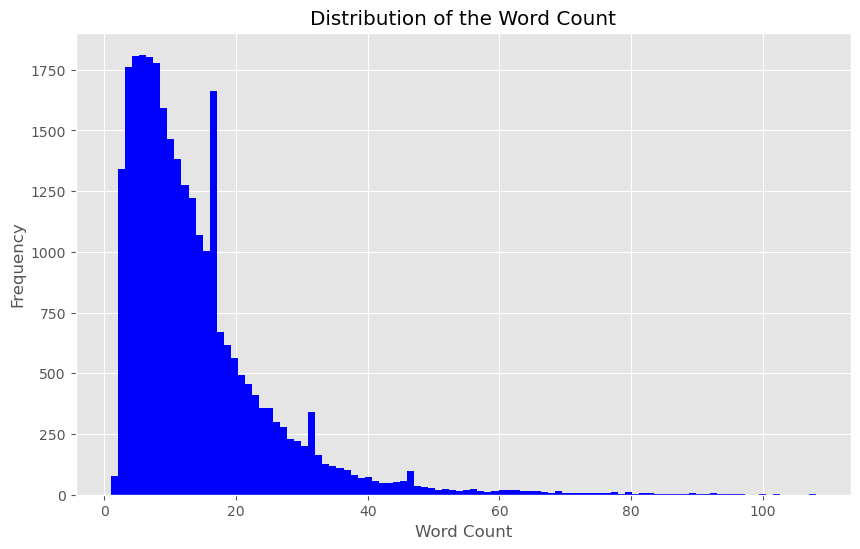

In [14]:
# Plot the distribution of the word count

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

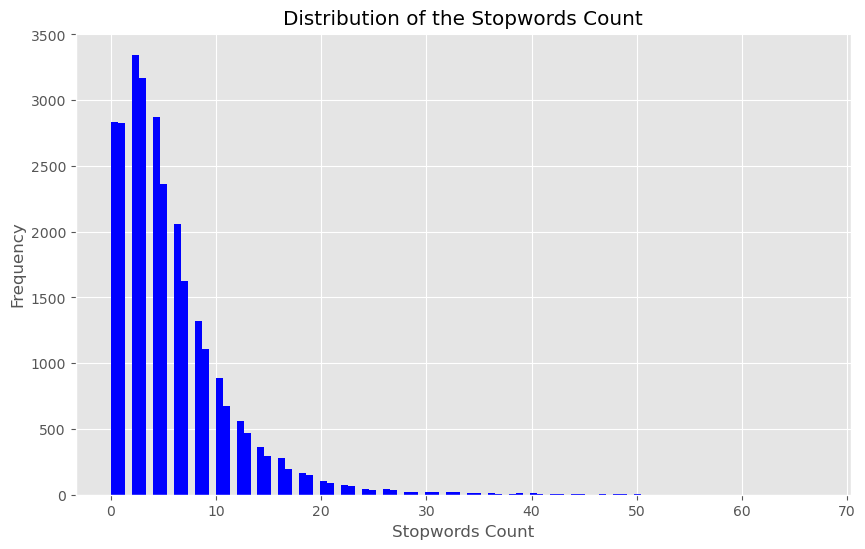

In [15]:
# Plot the distribution of the stopword count

plt.figure(figsize=(10, 6))
plt.hist(df['stopwords_count'], bins=101, color='blue')
plt.title('Distribution of the Stopwords Count')
plt.xlabel('Stopwords Count')
plt.ylabel('Frequency')
plt.show()

Both histograms are right skewed (positive skewness).

This indicates that __most comments have between 1 and 40 words__ in total, and between __0 and 20 stopwords__.

We also notice the presence of multiple outliers, which represent __comments with over 60 words, and over 30 stopwrords.__

To confirm our observations, let's __calculate the skewness and kurtosis__ on both columns.

In [16]:
# Skewness and Kurtosis of word_count
print("Skewness: %f" % df['word_count'].skew())
print("Kurtosis: %f" % df['word_count'].kurt())

Skewness: 2.474932
Kurtosis: 9.424836


In [17]:
# Skewness and Kurtosis of stopwords_count
print("Skewness: %f" % df['stopwords_count'].skew())
print("Kurtosis: %f" % df['stopwords_count'].kurt())

Skewness: 2.324923
Kurtosis: 9.248397


The calculations confirm our observations since a positive skewness means the distribution is right-skewed,

while the kurtosis measures the tailedness of our distribution, and we have a high kurtosis value.

Now, let's dive into the characters found in our texts.

First, let's __count the number of chars into a dictionary__ so we can visualize the character diversity that we are having.

In [18]:
def char_counts(df, colname):
    chars = {} # unique char counts
    for i, row in df.iterrows(): # loop through each text and each character
        if not isinstance(row[colname], str):
            continue
        for ch in row[colname]:
            chars[ch] = chars.get(ch, 0) + 1
    return chars
            
print(char_counts(df, 'text'))

{'I': 15133, 't': 142299, "'": 6970, 's': 107912, ' ': 370214, 'b': 24553, 'e': 189840, 'c': 39725, 'a': 132641, 'u': 59685, 'E': 11757, 'r': 95009, 'o': 128094, 'p': 29037, 'n': 108929, 'd': 57615, 'w': 33786, 'h': 82785, 'g': 30547, 'i': 121994, 'y': 37844, 'f': 28569, 'l': 78903, 'm': 45844, 'k': 16806, '.': 26994, '\n': 28291, 'T': 10909, 'M': 6163, 'v': 16334, 'S': 9006, 'B': 3211, ',': 16147, 'j': 3325, 'q': 1181, 'L': 6412, 'A': 12162, '–': 27, 'H': 6282, 'R': 6297, 'W': 4564, 'C': 4729, 'O': 7733, 'N': 6817, 'D': 3992, 'P': 2900, 'Q': 587, 'U': 4572, '“': 63, '”': 65, '(': 1365, 'J': 1981, '’': 96, 'x': 2175, '3': 677, '5': 854, ')': 1691, '-': 2813, '2': 1169, '0': 2252, '8': 418, 'V': 1086, '1': 1763, '9': 807, '7': 426, '4': 597, '%': 263, 'F': 2737, ':': 1245, '"': 3349, 'z': 1849, '?': 3816, 'K': 2147, 'Y': 3682, '!': 6028, 'G': 3205, '/': 609, '—': 15, '=': 232, 'X': 158, '_': 59, '\xad': 69, 'Z': 256, '\ufeff': 521, '@': 230, '6': 448, '&': 619, ';': 317, '#': 210, 'ق': 

We notice some characters from other languages different than english.

For this analysis we will be working only with english characters.

Let's create a function that remove these non-english characters along with other text processing techniques like:
- __remove digits__
- __remove punctuations__
- __remove special characters__
- __remove stopwords__
- __reomve whitespaces__
- __remove non-alphabetic values based on ascii values__

In [19]:
import nltk # natural language processing library
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
import string # standard Python string library

def clean_column(dataframe):

    """
    arg: passing the text column
    
    function: check for non-alpha values using ascii method, remove digits, remove punctuation, special characters,
    word tokenization,stopword removal and unwanted white space
    
    return: new column named cleaned_v_1
    """
    #making sure we are just passing the right column onlu
    comment= dataframe.text
    # removing no alpha values
    comment = re.sub(r'[^\w\s,]', '', comment)
    #removing new line character 
    comment = re.sub(r'\n','',comment)
        #removing unwanted characters.
    # not using ,. because it might lead to joining to words if there is no space
    comment=''.join([y.lower() for y in comment if y.isalpha() or y in " ,.'"])
    #removing . , / and other special character
    comment= re.sub(r'[\,\.\']',' ',comment)
    # digits and non- ascii value removal --> as our text contains non-english words
    comment = re.sub(r'\d+', '', comment)
    comment = ''.join(letter for letter in comment if ord(letter) < 128)
    # punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    #extra white spaces are found, revoming that
    comment = re.sub(r'\s{2,}', '', comment)
    #initializing the stop words present in NLTK lib
    stop_words=stopwords.words('english')
    #adding few stopwords using extend method
    addd=[ 'd','ll', 'm', 'o', 're', 've', 'y', 'ma','even','ur','u']
   
    #set is used to remove the stopwords easily
    stop_words=set(stop_words)
    # after doing research on the stopwords, we are  modifying the stopwords to avoid deleting the negations
    remov_list=["wouldn't","wouldn","won't","won","weren't","weren","wasn't","wasn","shouldn't","shouldn","shan't","shan","needn't","needn","mustn't","mustn","mightn't","mightn","isn't","isn","haven't","haven","hasn't","hasn","hadn't","hadn","doesn't","didn't","didn","couldn't","couldn","aren't","aren","ain","don't","don","not","no","nor"]
    for words in remov_list:
        stop_words.discard(words)
    for words in addd:
        stop_words.add(words)
    token = word_tokenize(comment.lower())
    
    token = [word for word in token if word not in stop_words]
    token=" ".join(token)
    
    if not token:
          return np.NaN #creating nan values for the empty string length
    return token

df['cleaned_v_1'] = df.apply(clean_column, axis=1)

Our __text cleaning and processing__ of the "text" column has been __saved into a new column__ named "cleaned_v_1" within the same dataframe.

Let's __visualize and compare__ our new cleaned text data with the previous unprocessed data.

Let's also see the results for both violent and non-violent comments.

In [20]:
# display some results for non-violent comments after text processing and cleaning
df[['text', 'cleaned_v_1', 'label']][df['label'] == 0][-10:]

,text,cleaned_v_1,label
28280,sorry but it's true\n,sorry true,0
28281,(and i have to mention the bombing of Serbia a...,mention bombing serbia kosovo day kosovo got i...,0
28282,somthing is going wrong here\n,somthing going wrong,0
28283,dont listen to this man @shiptarpogananacija h...,dont listen man shiptarpogananacija lier,0
28284,in kosovo they kild kids and wifes they serbia...,kosovo kild kids wifes serbians monsters not c...,0
28285,the are no risk from islam risk is from NEW WO...,no risk islam risk new world order tries make ...,0
28287,stupid brainwashed idiot..\n,stupid brainwashed idiot,0
28288,have you EVER been to Serbia or kosovo...fucki...,ever serbia kosovofucking idiotu dont know shit,0
28289,"probably u mean to this monsters, fucker /watc...",probably mean monstersfucker watchvvwrvmzjc,0
28290,the fucking funniest thing is that fucking ame...,fucking funniest thing fucking american cunt t...,0


In [21]:
# display some results for violent comments after text processing and cleaning
df[['text', 'cleaned_v_1', 'label']][df['label'] == 1][-10:]

,text,cleaned_v_1,label
28229,No because when we are done using our nukes on...,no done using nukes ground europe scorched earth,1
28230,You will have nothing but a burned poluted gro...,nothing burned poluted ground,1
28243,I call for nuclear crusade!\n,call nuclear crusade,1
28245,KILL THEM ALL!!\n,kill,1
28249,in 2050 there will not be any christian just d...,inthere not christian die anger idiot,1
28250,If that looks like happening --ALL your devil ...,looks like happening devil shrines mosques des...,1
28257,WE MUST CREATE A NEW ''Hitler'' THAT WILL DEST...,must create new hitler destroy every single ar...,1
28264,kill them all ﻿\n,kill,1
28265,In poland and ukraine they kill muslims :)﻿\n,poland ukraine kill muslims,1
28286,yeah we are all monsters..I'm gonna kill u rig...,yeah monstersim gon na kill right,1


Let's also __check if all non-english characters were removed, as well as punctuation, special characters and digits__.

For this we will used our previously implemented function __char_counts__.

In [22]:
char_counts(df, 'cleaned_v_1')

{'e': 146915,
 'u': 44122,
 'r': 79339,
 'o': 83735,
 'p': 31074,
 'a': 99468,
 'n': 88702,
 's': 93164,
 ' ': 176782,
 't': 91673,
 'w': 21946,
 'c': 41487,
 'h': 39718,
 'g': 32221,
 'y': 23578,
 'l': 74041,
 'i': 102955,
 'f': 16065,
 'm': 44371,
 'k': 18953,
 'b': 18935,
 'j': 4037,
 'd': 47564,
 'v': 13375,
 'q': 1768,
 'x': 2333,
 'z': 2105}

Now, we only have these limited type of characters within our comments, which suggests a more cleaned data.

Therefore, the goal of this section has been accomplished.

### 4. Word Clouds

To start with the word clouds we first need to __tokenize our texts__.

We will perform a __sentence and word tokenization__ on our comments in the following steps.

Both operation results will be __saved as new columns__ on our dataset.

The new columns will be the following:
- __'sent_token'__ : for sentence tokenization
- __'word_tokens'__ : for word tokenization

In [23]:
# sentence tokinization
df['sent_token']=df.text.apply(sent_tokenize)

In [24]:
df[df.sent_token.str.len()>4].tail()[['text', 'sent_token', 'label']] # visualizing some rows with more than 4 sentences

,text,sent_token,label
10393,I agre my bro!!!!FUCK THE ISLAM!!!!!Greetings ...,"[I agre my bro!!!, !FUCK THE ISLAM!!!!, !Greet...",1
10398,"and i well fuck you with big,biger and bigest ...","[and i well fuck you with big,biger and bigest...",0
10401,SERBIA suportetd you my BRO!!!!!!!!KILL MUSLIM...,"[SERBIA suportetd you my BRO!!!!!!!, !KILL MUS...",1
10467,FUCK YOU MOTHERFUCKER!!!!!!!WEE WEELL KILL YOU...,"[FUCK YOU MOTHERFUCKER!!!!!!, !WEE WEELL KILL ...",1
18862,"u see, i dont understand why ppl like to make ...","[u see, i dont understand why ppl like to make...",0


As we can see the the text was sentence tokenized for each row.

Now, let's perform the word tokenization.

In [25]:
def token_(text):
    """
    arg: passing the cleaned_v_1 column
    
    function: creating a word_token column with empty list for nan values
    
    return: new column named word_tokens
    """
    #checking for text cell only
    if isinstance(text,str): 
        word_tok=word_tokenize(text.lower())
        return(word_tok)
    #for empty cell
    else:
        return([])

# using the implemented method, let's apply word tokenization on our original clean data column 'cleaned_v_1'
df['word_tokens']=df['cleaned_v_1'].apply(token_)

In [26]:
df[df.word_tokens.str.len()>4].tail()[['text', 'word_tokens', 'label']] # visualizing some rows with more than 4 words

,text,word_tokens,label
28284,in kosovo they kild kids and wifes they serbia...,"[kosovo, kild, kids, wifes, serbians, monsters...",0
28285,the are no risk from islam risk is from NEW WO...,"[no, risk, islam, risk, new, world, order, tri...",0
28286,yeah we are all monsters..I'm gonna kill u rig...,"[yeah, monstersim, gon, na, kill, right]",1
28288,have you EVER been to Serbia or kosovo...fucki...,"[ever, serbia, kosovofucking, idiotu, dont, kn...",0
28290,the fucking funniest thing is that fucking ame...,"[fucking, funniest, thing, fucking, american, ...",0


We have succesfully tokenized our comments and saved them in separate columns.

One interesting way of __visualizing our data__ is through the use of __Word Clouds__.

The __size of each word__ in a word cloud represents the __frequency__ of the word within our entire textual data.

Let's __plot different word clouds__ from our __original data__, and from our already __processed__ data as well.

But first, let's define a __function__ that receives a column name, label and colors, and __plots a word cloud__ based on these parameters.

In [27]:
# !pip install wordcloud
from wordcloud import WordCloud # required library for wordcloud operations and plots

In [28]:
def word_cloud_label(col_name, lab, colr):
    """
    arg: passing the column name, label required, color of the plot
    
    function: word cloud
    
    return: plt.show()
    """
    word = df[df['label']==lab][col_name].tolist()
    if col_name=='word_tokens':
        word = [flatt for ls in word for flatt in ls]

    word = ' '.join(word)
    # Create and generate a word cloud image:
    wordcloud_ = WordCloud(width=800, height=400,background_color=colr).generate(word)
    
    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis("off")
    plt.show()

With the implemented function let's go ahead and plot a word cloud for each of the following cases:
- __original unprocessed data - non-violent comments__
- __(word) tokenized data - non-violent comments__
- __original unprocessed data - violent comments__
- __(word) tokenized data - violent comments__

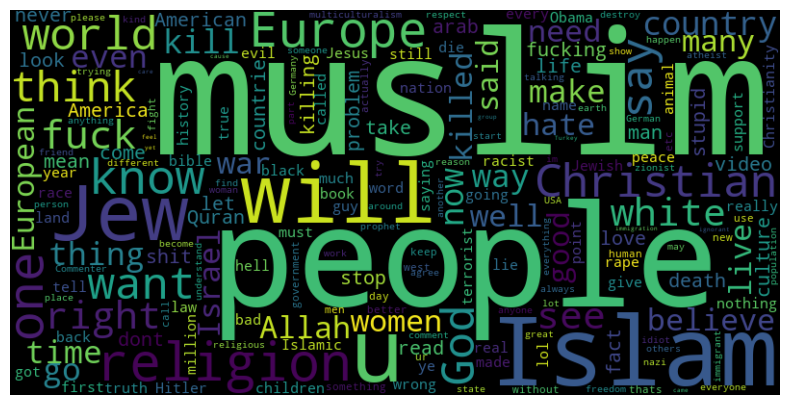

In [29]:
# unprocessed text word cloud --> non-toxic

word_cloud_label('text',0,'black')

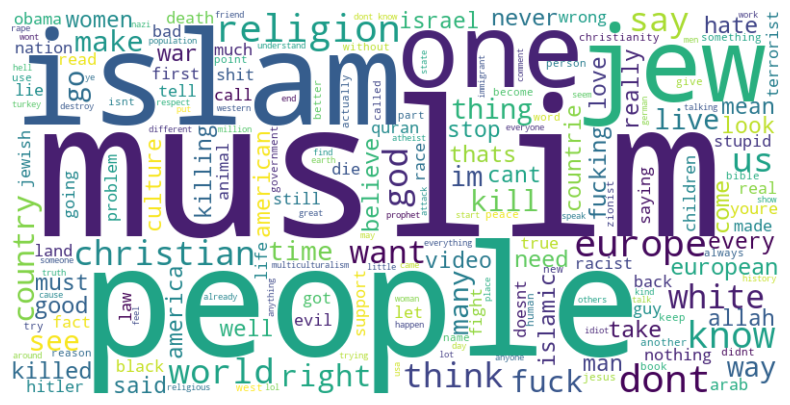

In [30]:
#processed word-token word cloud--> non-toxic

word_cloud_label('word_tokens',0,'white')

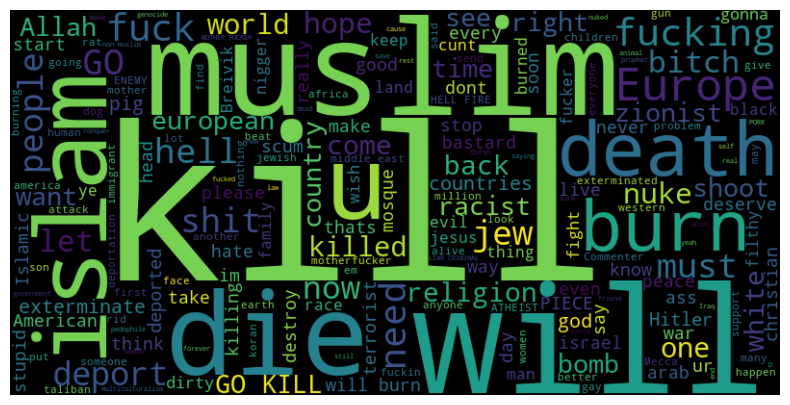

In [31]:
#unprocessed text word cloud ==> toxic

word_cloud_label('text',1,'black')

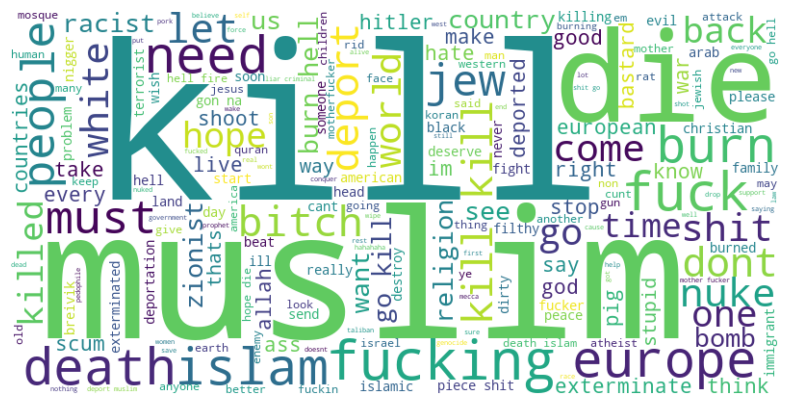

In [32]:
#processed word-token word cloud--> toxic

word_cloud_label('word_tokens',1,'white')

Some of the insights that we get from these word clouds are:
- Most violent comments refer to religion, ethnicity, countries, insults, and people adjetives.
- For both cases (violent and non-violent) we can see a slightly difference on the size of the words when comparing before and after text processing.
- Some "1-letter words" and words that appear multiple times are not present in the processed clouds, which indiciates a succesful removal of these type of words.

### 5. Word Vectorization methods


As part of applying word vectorization methods, we will __apply a lemmatization method__ on our words.

This will convert our words into its __root form__, __considerably reducing the number of unique words__.

One consequence of lemmatizing our words will be __reducing the number of columns__ that we'll get after applying a word vectorization technique in later steps.

In [33]:
# Applying lemmatization (verb form)
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [34]:
df['word_tokens_v'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y,pos='v') for y in x])
df['word_tokens_n'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y,pos='n') for y in x])

In [35]:
df['word_tokens_v'].tail()

28286             [yeah, monstersim, gon, na, kill, right]
28287                           [stupid, brainwash, idiot]
28288    [ever, serbia, kosovofucking, idiotu, dont, kn...
28289     [probably, mean, monstersfucker, watchvvwrvmzjc]
28290    [fuck, funniest, thing, fuck, american, cunt, ...
Name: word_tokens_v, dtype: object

In [36]:
df['word_tokens_n'].tail()

28286             [yeah, monstersim, gon, na, kill, right]
28287                         [stupid, brainwashed, idiot]
28288    [ever, serbia, kosovofucking, idiotu, dont, kn...
28289     [probably, mean, monstersfucker, watchvvwrvmzjc]
28290    [fucking, funniest, thing, fucking, american, ...
Name: word_tokens_n, dtype: object

Column description recap (only text columns):

0. __text__ --> original data
1. __cleaned_v_1__ --> cleaned text in string type
2. __word tokens__ --> list of words
3. __word_tokens_v__ --> list of lemma words in verb form
4. __word_tokens_n__ --> list of lemma words in noun form

Now that we have these new lemmatized words columns for both __verb and noun roots__,

let's actually go ahead and __perform the word vectorization__.

## Bag of Words

Let's use this word vectorization technique first because it is easy to understand at first and,

it will allow us to extract relevant features from our texts and use them for modeling.

Let's start by importing the required libraries and handle np.nan values to avoid errors during the processing.

In [37]:
df['cleaned_v_1'] = df['cleaned_v_1'].fillna('') #handling the value error for np.NaN values in the text

In [38]:
# Apply bag of words to the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df['cleaned_v_1']).toarray()

In [39]:
cv.get_feature_names_out()

array(['aaaaaaah', 'aaaand', 'aabortion', ..., 'zyklon', 'zypernfrage',
       'zzz'], dtype=object)

In [40]:
feature_names = cv.get_feature_names_out()
pd.DataFrame(bag_of_words, columns = feature_names)

,aaaaaaah,aaaand,aabortion,aacademic,aah,aallah,aan,aand,aandraag,aanhangertje,...,zulus,zum,zusammenleben,zustnde,zwaar,zweig,zwishen,zyklon,zypernfrage,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ = TfidfVectorizer(ngram_range=(1,3))
feature_matrix = tfidf_.fit_transform(df['cleaned_v_1'])
# tfidf_df = pd.DataFrame( feature_matrix.toarray(),columns = tfidf_.vocabulary)

In [42]:
tfidf_.get_feature_names_out()

array(['aaaaaaah', 'aaaaaaah last', 'aaaaaaah last judgment', ..., 'zzz',
       'zzz guys', 'zzz guys shud'], dtype=object)

In [43]:
# feature_names = tfidf_.get_feature_names_out()
# pd.DataFrame(feature_matrix.toarray(), columns = feature_names)

### 6. Model Building

In [55]:
from nltk import pos_tag
from nltk.corpus import wordnet
class LemmaTokenizer:
    def __init__(self):
        self.download_assets()
        self.wnl = WordNetLemmatizer()
        self.stopwords = set(stopwords.words("english"))

    @classmethod
    def download_assets(cls)->None:
        """
        Download the necessary assets for the tokenizer

        :return: None
        """
        nltk.download("stopwords", quiet=True)
        nltk.download("wordnet", quiet=True)
        nltk.download("punkt", quiet=True)
        nltk.download("omw-1.4", quiet=True)
        nltk.download("averaged_perceptron_tagger", quiet=True)

    def __call__(self, doc):
        """
        Tokenize and lemmatize the document

        :param doc: The document to tokenize and lemmatize

        :return: The tokenized and lemmatized document
        """
        nltk_tagged = pos_tag(word_tokenize(doc))
        wordnet_tagged = ((x[0], self.nltk_pos_tagger(x[1])) for x in nltk_tagged)

        return [
            self.wnl.lemmatize(token, tag)
            for token, tag in wordnet_tagged
            if token not in self.stopwords and any(c.isalpha() for c in token)
        ]

    def nltk_pos_tagger(self, nltk_tag):
        """
        Convert the nltk tag to wordnet tag

        :param nltk_tag: The nltk tag

        :return: The wordnet tag
        """
        if nltk_tag.startswith("J"):
            return wordnet.ADJ
        elif nltk_tag.startswith("V"):
            return wordnet.VERB
        elif nltk_tag.startswith("N"):
            return wordnet.NOUN
        elif nltk_tag.startswith("R"):
            return wordnet.ADV
        else:
            return wordnet.NOUN

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    tokenizer=LemmaTokenizer(),
    strip_accents="unicode", # Remove accents and perform other character normalization
    ngram_range=(1, 2), # Use unigrams and bigrams
    min_df=0.0005, # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.8, # Ignore terms that have a document frequency strictly higher than the given threshold
)

#### Split the data into train and test

In [56]:
#Move to the top
from sklearn.model_selection import train_test_split

def split_data(df, test_size):
    """
    Split the data into training and testing

    :param df: The dataframe to split
    :param test_size: The size of the testing data

    :return: The training and testing data
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame")

    if not isinstance(test_size, float):
        raise ValueError("test_size must be a float")
    
    if test_size <= 0 or test_size >= 1:
        raise ValueError("test_size must be a float between 0 and 1")
    
    # Check in the columns are present
    if "text" not in df.columns or "label" not in df.columns:
        raise ValueError("df must have a 'text' and 'label' column")
    else:
        x_raw, y = df["text"], df["label"]
        x_train, x_test, y_train, y_test = train_test_split(
            x_raw.values, y.values, test_size=test_size, stratify=y, random_state=0
        )
        x_train, x_test = x_train.flatten(), x_test.flatten()
        return x_train, x_test, y_train, y_test
    


In [57]:
test_size = 0.1
x_train, x_test, y_train, y_test = split_data(df, test_size)

#### Model Naive Bayes

In [59]:
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = MultinomialNB()

pipeline = Pipeline([("vectorizer", vectorizer), ("clf", clf)])

print("Model training")
pipeline.fit(x_train, y_train)

print("Model evaluation")
pipeline.score(x_test, y_test)
y_pred_test = pipeline.predict(x_test)

f1 = f1_score(y_test, y_pred_test, average="macro")
print(balanced_accuracy_score(y_test, y_pred_test))
accuracy_score(y_test, y_pred_test)

num_features_basic = vectorizer.transform(x_test).shape[1]

Model training


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model evaluation
0.7035842176514259


In [60]:
## Plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test, labels=[0, 1])

array([[2642,   52],
       [  78,   58]], dtype=int64)

In [61]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Number of features: 2304
Accuracy: 0.9540636042402827
F1 Score: 0.7237664471214347


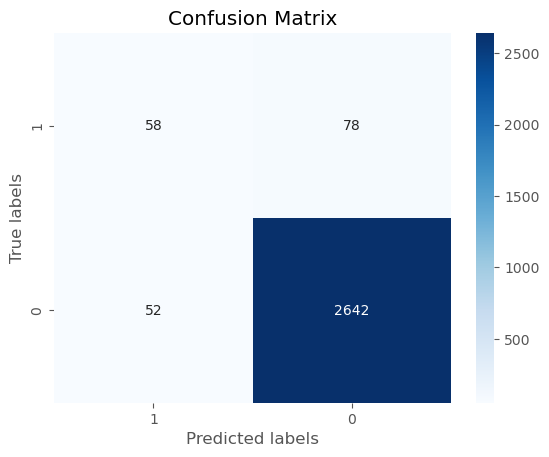

In [63]:
print(f"Number of features: {num_features_basic}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"F1 Score: {f1}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot the confusion matrix

    :param y_true: The true labels
    :param y_pred: The predicted labels
    :param labels: The labels to use
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

plot_confusion_matrix(y_test, y_pred_test, [1, 0])

In [64]:
### Model Evaluation

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2694
           1       0.53      0.43      0.47       136

    accuracy                           0.95      2830
   macro avg       0.75      0.70      0.72      2830
weighted avg       0.95      0.95      0.95      2830



### 7. Evaluating Model Results

In [65]:
## Save the model

import joblib

joblib.dump(pipeline, "model.pkl")

## Load the model

model = joblib.load("model.pkl")

model.score(x_test, y_test)

## Predict

0.9540636042402827

In [66]:
!pip install googledrivedownloader

In [67]:
### Python Code to dowload file from google drive

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1URSwK6HKKbD2LLokDZI4xhzSj07ShkXm', dest_path='./test_youtube.csv')


In [68]:
you_tube_data = pd.read_csv('test_youtube.csv')

you_tube_data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
## Select the text column and IsToxic column True

you_tube_data = you_tube_data[["Text", "IsToxic"]]
you_tube_data.head()

#Create New Column Wiit prediction 

you_tube_data["Predicted"] = model.predict(you_tube_data["Text"])



In [70]:
you_tube_data.head()

,Text,IsToxic,Predicted
0,If only people would just take a step back and...,False,0
1,Law enforcement is not trained to shoot to app...,True,1
2,\nDont you reckon them 'black lives matter' ba...,True,0
3,There are a very large number of people who do...,False,0
4,"The Arab dude is absolutely right, he should h...",False,1
